In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
path = 'sample-trace-query-order.json'
# read json file to data frame                                                                                                    
trace_df = pd.read_json(path)
print(trace_df)

     duration                       start                         end  \
0          34  2020-07-28T09:31:19.476745  2020-07-28T09:31:19.511703   
1          17  2020-07-28T09:31:19.511747  2020-07-28T09:31:19.528831   
2          66  2020-07-28T09:31:19.476678  2020-07-28T09:31:19.542900   
3          13  2020-07-28T09:31:19.543125  2020-07-28T09:31:19.556430   
4          16  2020-07-28T09:31:19.556514  2020-07-28T09:31:19.573113   
..        ...                         ...                         ...   
97         19  2020-07-28T09:31:21.196672  2020-07-28T09:31:21.216365   
98          9  2020-07-28T09:31:21.216442  2020-07-28T09:31:21.225631   
99         20  2020-07-28T09:31:21.227076  2020-07-28T09:31:21.247512   
100        15  2020-07-28T09:31:21.247547  2020-07-28T09:31:21.263107   
101      1866  2020-07-28T09:31:19.448973  2020-07-28T09:31:21.315319   

                                                  info  
0    Invoked BlockingMadDBHttpClient method `headDo...  
1    Invo

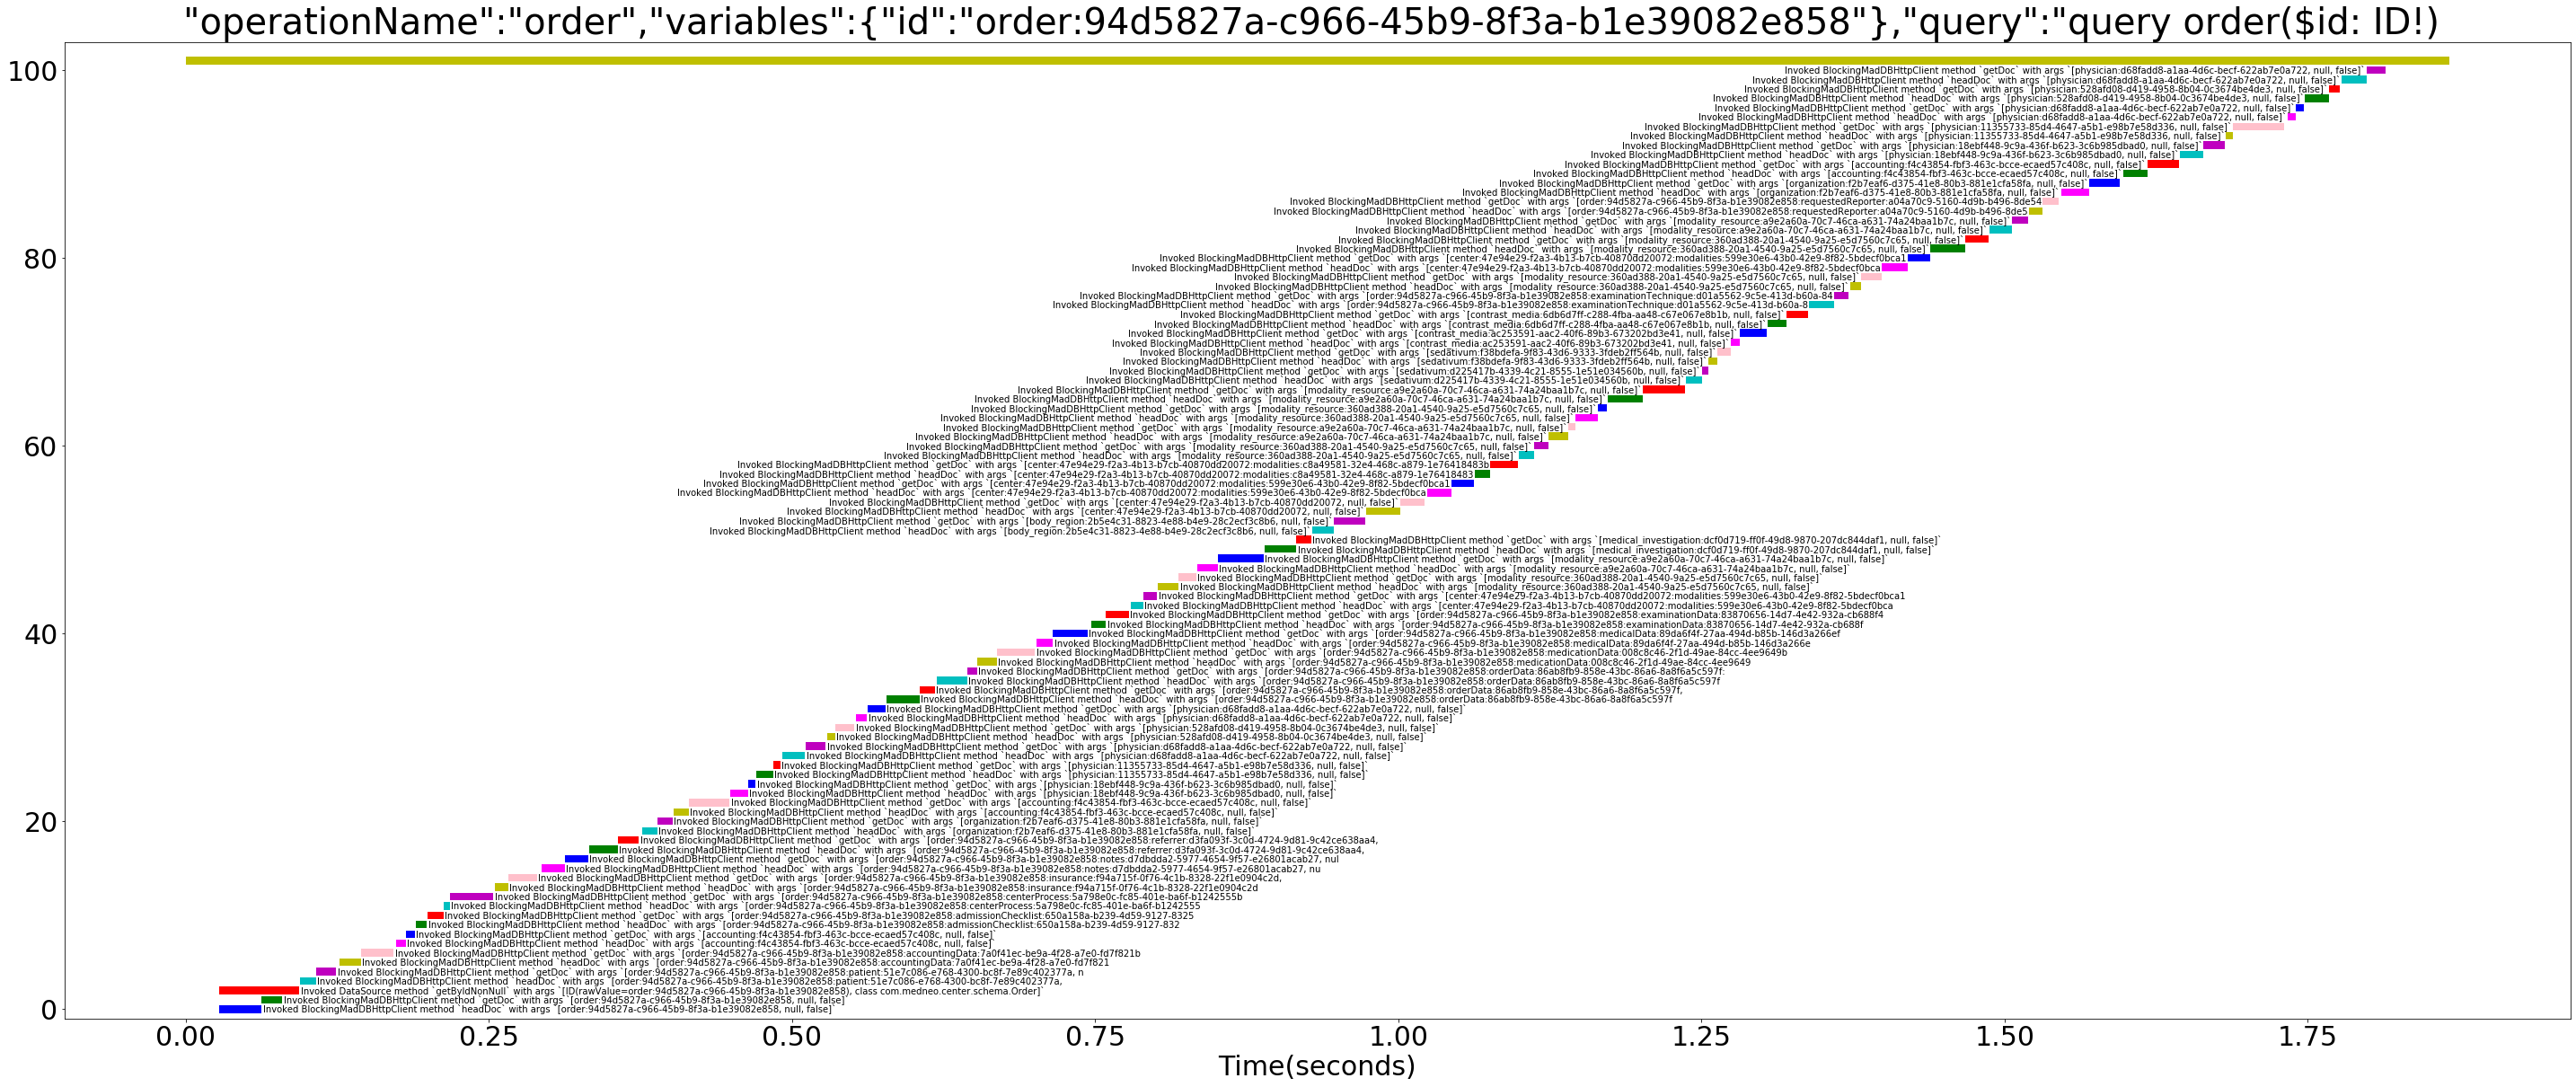

In [4]:

label = trace_df['info']
begin = pd.to_datetime(trace_df['start'], format='%Y-%m-%dT%H:%M:%S.%f')
end = pd.to_datetime(trace_df['end'], format='%Y-%m-%dT%H:%M:%S.%f')
length =  trace_df['duration']

offset = begin.min()

begin = begin - offset
end = end - offset

begin = begin.dt.total_seconds()
end = end.dt.total_seconds()

last_idx = len(label) - 1

title = label[last_idx][50:]
title = title[:title.index("{",title.index("query"))]

plt.figure(figsize=(50,20))
plt.barh(range(len(begin)), (end-begin), left=begin, color = ['b', 'g', 'r', 'c', 'm', 'y','pink','magenta'])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.title(title, fontsize = '40')
plt.xlabel('Time(seconds)', fontsize = '30')
# plt.yticks(range(len(begin)), "")
plt.xlim(begin.min()-.1, end.max()+.1)
plt.ylim(-1, len(begin)+1)
for i in range(last_idx):
    if i<last_idx/2:
        plt.text(end[i]+.001, i, label[i][:150], ha='left', va='center', fontsize = '10')
    else: 
        plt.text(begin[i]-.001, i, label[i][:150], ha='right', va='center', fontsize = '10')

plt.show()        